In [1]:
##IronKaggle

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline

In [10]:
sales = pd.read_csv('sales.csv')
display(sales)

,Unnamed: 0,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales
0,425390,366,4,2013-04-18,517,1,0,0,0,4422
1,291687,394,6,2015-04-11,694,1,0,0,0,8297
2,411278,807,4,2013-08-29,970,1,1,0,0,9729
3,664714,802,2,2013-05-28,473,1,1,0,0,6513
4,540835,726,4,2013-10-10,1068,1,1,0,0,10882
...,...,...,...,...,...,...,...,...,...,...
640835,359783,409,6,2013-10-26,483,1,0,0,0,4553
640836,152315,97,1,2014-04-14,987,1,1,0,0,12307
640837,117952,987,1,2014-07-07,925,1,0,0,0,6800
640838,435829,1084,4,2014-06-12,725,1,0,0,0,5344


In [68]:
sales.dtypes

Unnamed: 0               int64
store_ID                 int64
day_of_week              int64
date                    object
nb_customers_on_day      int64
open                     int64
promotion                int64
state_holiday           object
school_holiday           int64
sales                    int64
Avg_revenue            float64
dtype: object

In [42]:
sales.shape

(640840, 12)

In [12]:
sales.isnull().sum() # no Nan values - yupiie

Unnamed: 0             0
store_ID               0
day_of_week            0
date                   0
nb_customers_on_day    0
open                   0
promotion              0
state_holiday          0
school_holiday         0
sales                  0
dtype: int64

In [ ]:
# Creating a column called 'Revenue'

In [21]:
#sales['revenue'] = sales['nb_customers_on_day']*sales['sales']

In [46]:
#sales = sales.drop('revenue',axis = 1)

In [34]:
sales['Avg_revenue'] = sales['sales']/sales['nb_customers_on_day']

In [36]:
Avg_revenue.head(60)

0      8.553191
1     11.955331
2     10.029897
3     13.769556
4     10.189139
5      8.273622
6           NaN
7     10.092224
8     12.408482
9     13.735395
10          NaN
11     7.469607
12     9.083721
13     9.973301
14     9.320828
15    15.206897
16    11.737557
17    10.306699
18          NaN
19     8.200328
20    11.395210
21     9.820593
22     6.704865
23    12.971311
24     8.451642
25     9.436693
26    12.146341
27     9.034151
28     9.394183
29     8.965046
30    10.420110
31     9.034826
32    10.133829
33     7.580986
34          NaN
35          NaN
36     8.956522
37     8.797724
38     8.625541
39          NaN
40     8.012035
41    13.180451
42     7.593893
43    11.130548
44          NaN
45     8.800518
46     7.114603
47     9.560000
48     9.905498
49     7.120746
50          NaN
51     9.737060
52     6.884581
53    11.827725
54    10.476255
55     8.137255
56          NaN
57     8.990950
58          NaN
59          NaN
dtype: float64

In [47]:
sales.head(60)

,Unnamed: 0,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales,Avg_revenue
0,425390,366,4,2013-04-18,517,1,0,0,0,4422,8.553191
1,291687,394,6,2015-04-11,694,1,0,0,0,8297,11.955331
2,411278,807,4,2013-08-29,970,1,1,0,0,9729,10.029897
3,664714,802,2,2013-05-28,473,1,1,0,0,6513,13.769556
4,540835,726,4,2013-10-10,1068,1,1,0,0,10882,10.189139
5,687329,674,2,2013-03-19,1016,1,1,0,0,8406,8.273622
6,600327,659,7,2014-06-08,0,0,0,0,0,0,NaN
7,96265,27,3,2014-07-16,1106,1,1,0,1,11162,10.092224
8,364435,347,6,2013-05-11,448,1,0,0,0,5559,12.408482
9,163146,288,2,2013-06-25,291,1,0,0,0,3997,13.735395


In [38]:
# Filtering - only when the shop was open

In [40]:
sales_open = sales[sales['open']==1]

In [41]:
sales_open.shape

(532016, 12)

In [45]:
# group by - mean of sales, customers per day and revenue

In [51]:
sales_open.groupby(['store_ID']).agg({'sales':np.mean, 'nb_customers_on_day':np.mean, 'Avg_revenue': np.mean})

,sales,nb_customers_on_day,Avg_revenue
store_ID,,,
1,4769.382643,564.493097,8.405626
2,4907.566929,579.322835,8.382362
3,6886.496000,746.586000,9.092641
4,9714.846639,1327.577731,7.275308
5,4650.859470,537.340122,8.586608
...,...,...,...
1111,5320.891837,456.228571,11.599703
1112,10143.727459,831.645492,11.999366
1113,6643.220202,720.072727,9.195767


In [ ]:
# Find the mean of the revenue in sales_open

In [59]:
mean_revenue =np.mean(sales_open['Avg_revenue'])

In [60]:
mean_revenue

9.49464455264607

In [ ]:
## Data Visualization

In [119]:
sns.set(style="darkgrid")

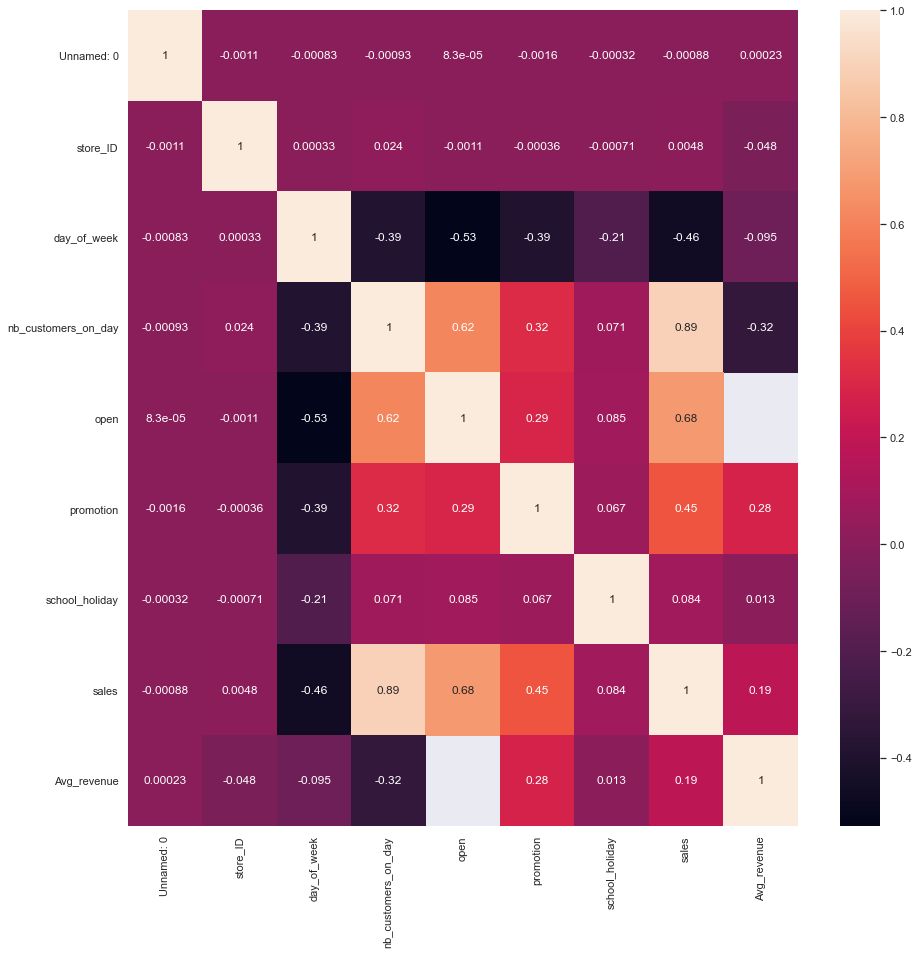

In [120]:
plt.figure(figsize=(15,15))
corr= sales.corr()
sns.heatmap(corr, annot=True)
plt.show()

In [121]:
# Pair plot

<Figure size 720x720 with 0 Axes>

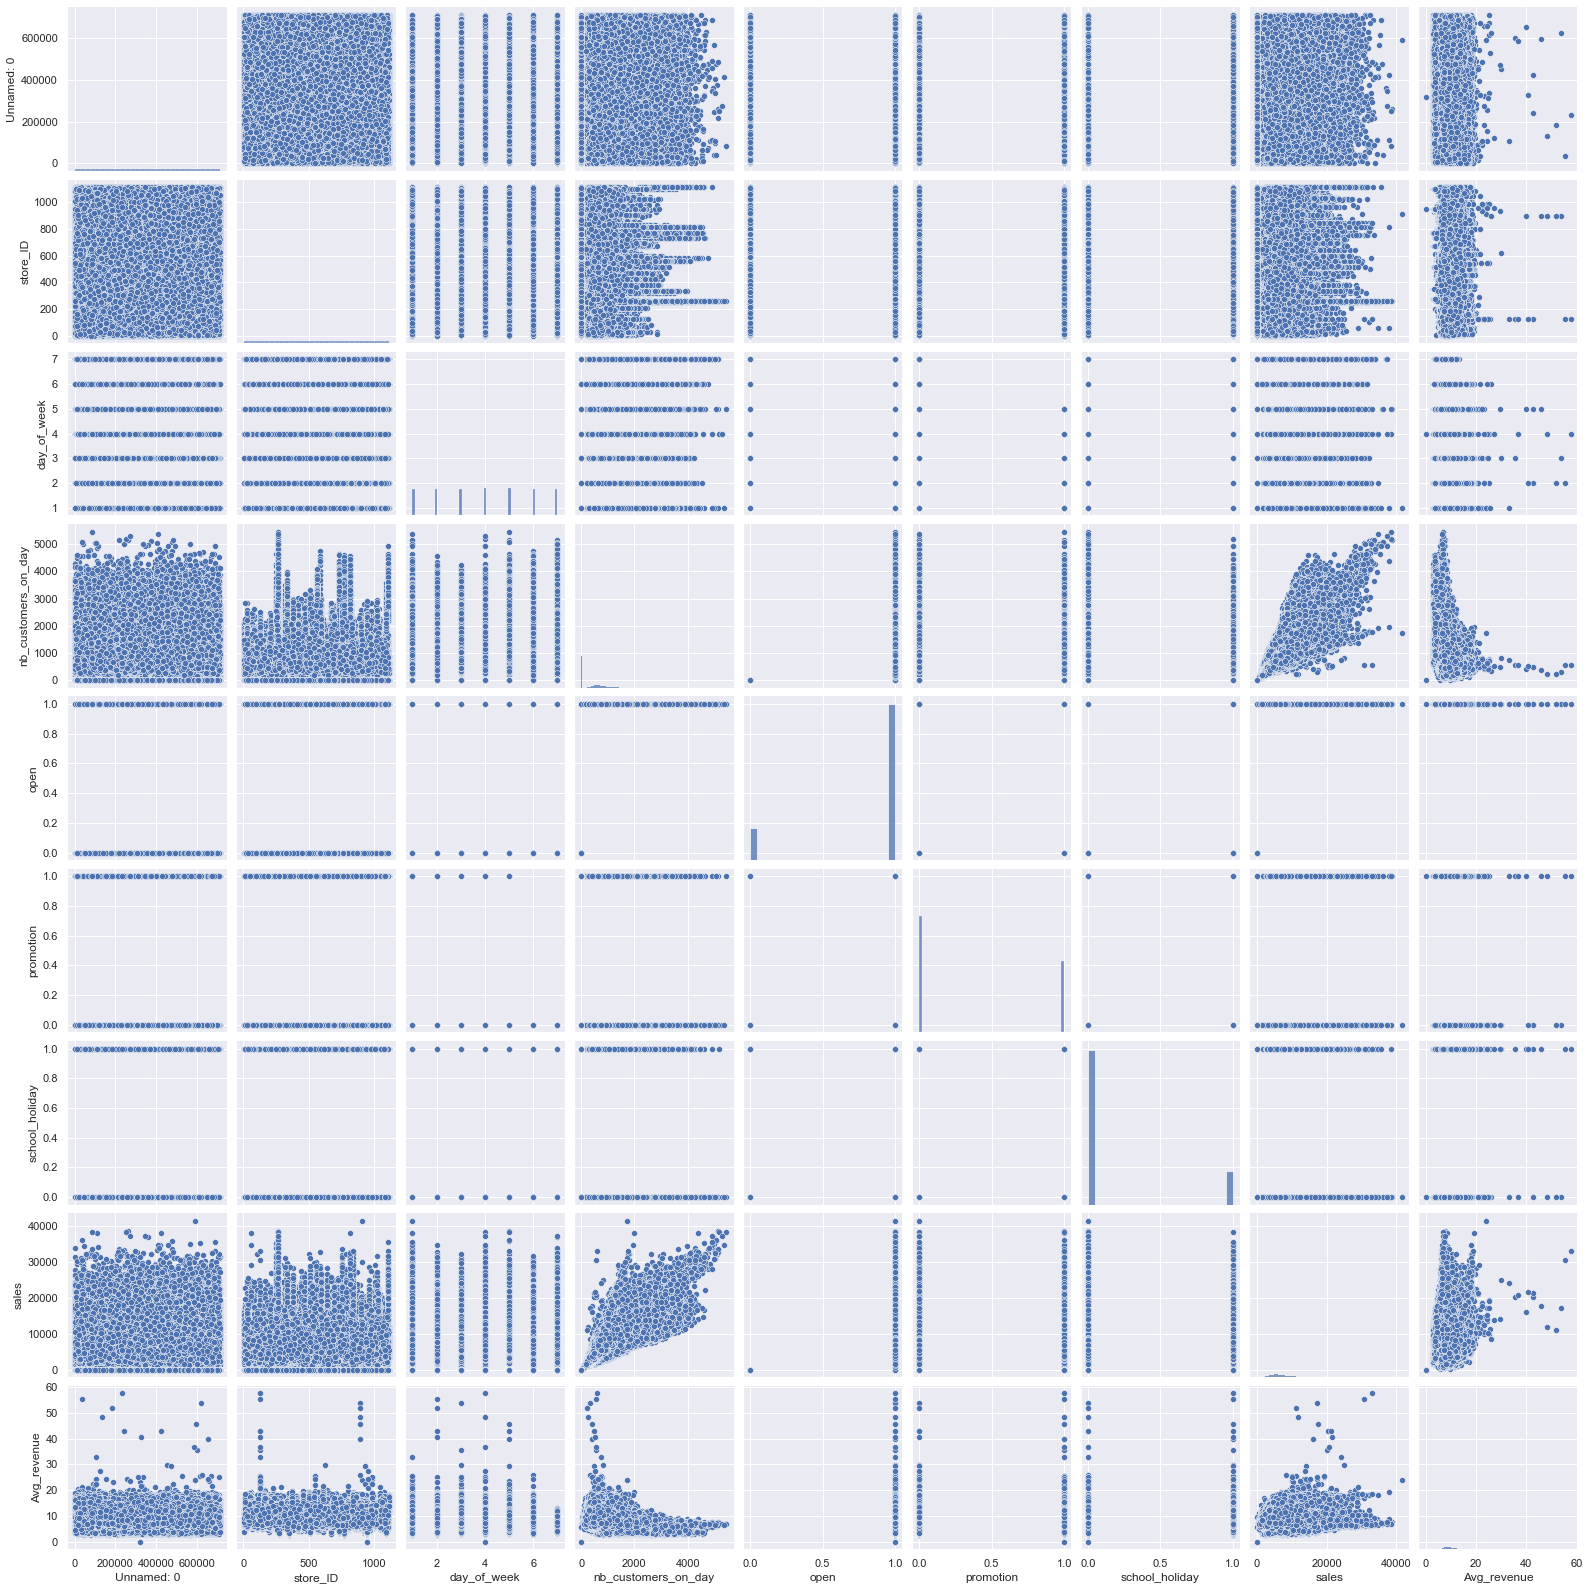

In [122]:
fig = plt.figure(figsize=(10,10))
sns.pairplot(sales)
plt.show()

In [123]:
## Count plot and Distribution plot

In [124]:
# Open

1    532016
0    108824
Name: open, dtype: int64


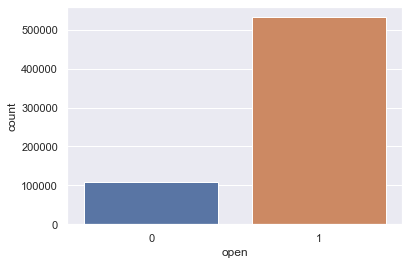

In [125]:
print(sales.open.value_counts())
sns.countplot(data=sales, x="open")
plt.show()

In [126]:
# Day_of_week

5    92138
4    91972
2    91686
3    91651
6    91347
7    91075
1    90971
Name: day_of_week, dtype: int64


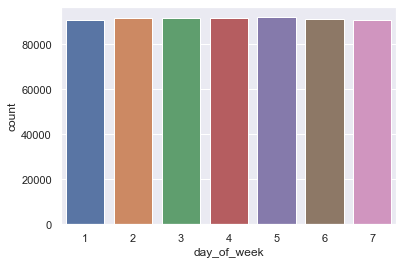

In [127]:
print(sales.day_of_week.value_counts())
sns.countplot(data=sales, x="day_of_week")
plt.show()

In [128]:
# Promotion

0    396220
1    244620
Name: promotion, dtype: int64


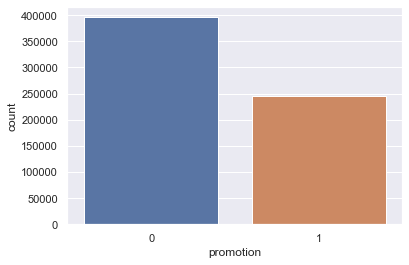

In [129]:
print(sales.promotion.value_counts())
sns.countplot(data=sales, x="promotion")
plt.show()

In [130]:
# Adding a 'year column'

In [131]:
import re
def return_year(x):
    lst = re.split('-',x)
    return lst[0]

In [132]:
sales_open['year'] = sales_open['date'].apply(return_year)
sales_open.head()

<ipython-input-132-1384628f6167>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_open['year'] = sales_open['date'].apply(return_year)


,Unnamed: 0,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales,revenue,Avg_revenue,year,month
0,425390,366,4,2013-04-18,517,1,0,0,0,4422,2286174,8.553191,2013,04
1,291687,394,6,2015-04-11,694,1,0,0,0,8297,5758118,11.955331,2015,04
2,411278,807,4,2013-08-29,970,1,1,0,0,9729,9437130,10.029897,2013,08
3,664714,802,2,2013-05-28,473,1,1,0,0,6513,3080649,13.769556,2013,05
4,540835,726,4,2013-10-10,1068,1,1,0,0,10882,11621976,10.189139,2013,10


2013    212861
2014    195699
2015    123456
Name: year, dtype: int64


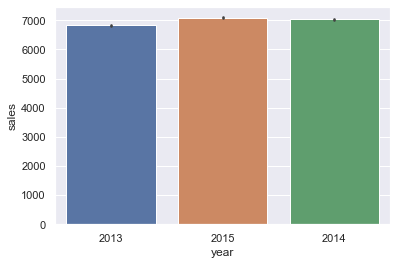

In [133]:
sns.barplot (data = sales_open, x='year', y='sales')
print(sales_open.year.value_counts())

In [134]:
def return_month(x):
    lst = re.split('-',x)
    return lst[1]

In [135]:
sales_open['month'] = sales_open['date'].apply(return_month)
sales_open.head()

<ipython-input-135-3be3eb357ef7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_open['month'] = sales_open['date'].apply(return_month)


,Unnamed: 0,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales,revenue,Avg_revenue,year,month
0,425390,366,4,2013-04-18,517,1,0,0,0,4422,2286174,8.553191,2013,04
1,291687,394,6,2015-04-11,694,1,0,0,0,8297,5758118,11.955331,2015,04
2,411278,807,4,2013-08-29,970,1,1,0,0,9729,9437130,10.029897,2013,08
3,664714,802,2,2013-05-28,473,1,1,0,0,6513,3080649,13.769556,2013,05
4,540835,726,4,2013-10-10,1068,1,1,0,0,10882,11621976,10.189139,2013,10


In [136]:
# Sales by month

01    54386
03    54156
07    53895
06    52164
04    51389
05    50549
02    50525
08    34248
10    33604
09    32968
11    32395
12    31737
Name: month, dtype: int64


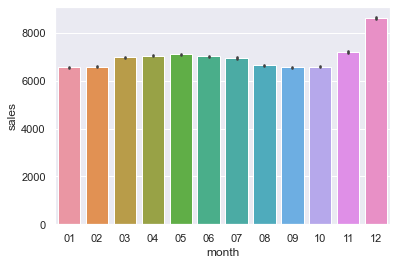

In [137]:
sns.barplot (data = sales_open, x='month', y='sales', order = ['01','02','03','04','05','06','07','08','09','10','11','12'])
print(sales_open.month.value_counts())

<Figure size 1440x1440 with 0 Axes>

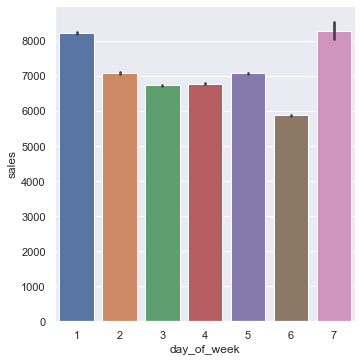

In [138]:
plt.figure(figsize=(20,20))
sns.catplot(data=sales_open, kind='bar', x='day_of_week', y='sales')

In [141]:
sales_day_of_week = sales_open[sales_open['year']==2013]

In [142]:
# Highest and lowest day of the week

<AxesSubplot:xlabel='promotion', ylabel='day_of_week'>

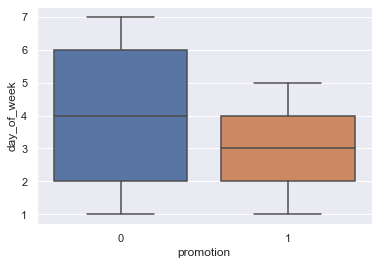

In [143]:
sns.boxplot(x = "promotion", y = "day_of_week", data = sales_open)

In [144]:
# Promotion

0    294460
1    237556
Name: promotion, dtype: int64


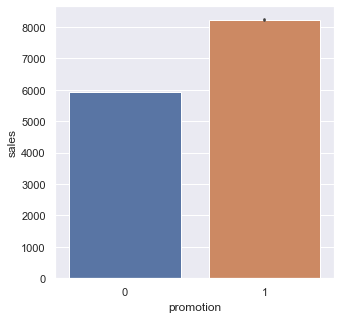

In [145]:
plt.figure(figsize=(5,5))
sns.barplot (data = sales_open, x='promotion', y='sales')
print(sales_open.promotion.value_counts())

In [146]:
 # Boxplot promotion vs sales

<AxesSubplot:xlabel='promotion', ylabel='sales'>

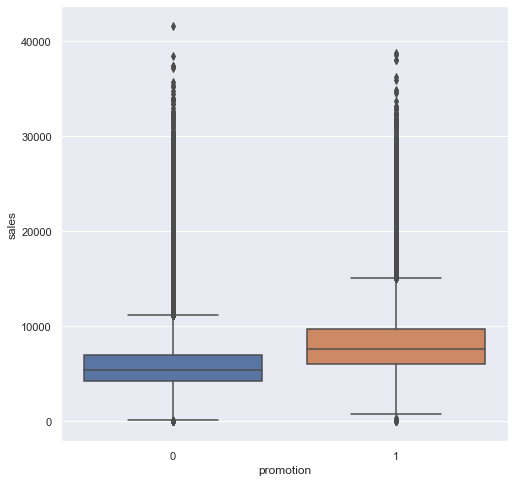

In [147]:
plt.figure(figsize=(8,8))
sns.boxplot(x = "promotion", y = "sales", data = sales_open)

In [148]:
 # Boxplot year vs sales

<AxesSubplot:xlabel='year', ylabel='Avg_revenue'>

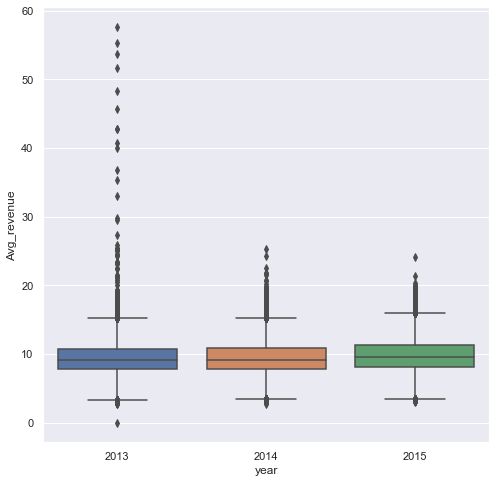

In [149]:
plt.figure(figsize=(8,8))
sns.boxplot(x = "year", y = "Avg_revenue", data = sales_open, order = ['2013','2014','2015'])

In [150]:
print(sales_open.store_ID.value_counts())

494     617
85      613
353     610
259     609
1045    597
       ... 
542     364
263     362
1065    361
859     360
81      360
Name: store_ID, Length: 1115, dtype: int64
